# Tarea 5

NOTA
Los ejercicios de este notebook componen la Tarea5, para la que las fechas relevantes son:
Envío del PR inicial: lunes 17 de octubre
Aceptación del PR: lunes 31 de octubre

# Exponente(s) de Lyapunov

Una manera de caracterizar el caos en el sentido de *sensibilidad a condiciones iniciales* es a través de los exponentes de Liapunov. La idea es sencilla: si hay una separación *exponencial* de condiciones iniciales muy cercanas, entonces diremos que hay caos.

Por esto, simplemente monitoreamos la evolución de dos condiciones iniciales cercanas, $x_0$ y $x_0+\epsilon$, donde $\epsilon>0$ y pequeño.

Considerando mapeos en una dimensión, la distancia entre los iterados $n$ es

\begin{equation}
D_n = \big|\, f^{n}(x_0+\epsilon)-f^{n}(x_0) \big|\,.
\end{equation}

ntonces, suponiendo que $d_n$ tiene una dependencia exponencial de $n$, para $n\to\infty$ y $\epsilon\to 0$, escribimos $d_n= \epsilon \exp(\lambda n)$, de donde obtenemos

\begin{equation}
\lambda(x_0) \equiv \lim_{n\to\infty} \lim_{\epsilon\to 0} 
\frac{1}{n}\log\Big| \frac{f^{n}(x_0+\epsilon)-f^{n}(x_0)}{\epsilon}\Big|.
\end{equation}

A $\lambda(x_0)$ se le llama exponente de Lyapunov. Si $\lambda(x_0)>0$ diremos que hay caos, mientras que si $\lambda(x_0)<0$ diremos que no lo hay.

Observaciones:

- El exponente de Liapunov, estrictamente hablando, depende de la condición inicial $x_0$.

- En la definición del exponente de Lyapunov se require la evaluación de **dos** límites, uno que involucra al tiempo ($n\to\infty$), y otro a la condición inicial ($\epsilon\to 0$).

- La definición del exponente de Lyapunov es sutil, ya que en muchas ocasiones *sabemos* que el rango de $f(x)$ y de $f^n(x)$ es acotado cuando $x$ está en cierto dominio, lo que entonces podría llevar erróneamente a concluir que $\lambda(x_0)=0$. (La sutileza está en que el órden de los límites no conmuta.)

-

Si el mapeo $f(x)$ es suficientemente suave, entonces podemos escribir

\begin{equation}
\lambda(x_0) = \lim_{n\to\infty} \frac{1}{n}\log\Big| \frac{{\rm d} f^{n}}{{\rm d}x}(x_0)\Big|,
\end{equation}

Usando que

\begin{equation}
\frac{{\rm d}f^n}{{\rm d}x}(x_0) = f'(x_0) f'(x_1)\dots f'(x_{n-1}) 
= \prod_{i=1}^{n} f'(x_i), 
\end{equation}

donde $x_i=f^i(x_0)$
obtenemos

\begin{equation}
\lambda(x_0) = \lim_{n\to\infty} \frac{1}{n} \sum_{i=1}^n \log
\Big| \, f'(x_i)\, \Big|.
\end{equation}

**Ejercicio 1:**

Obtengan, para la familia de mapeos cuadrática $Q_c(x)$, el diagrama que muestra el exponente de Lyapunov en términos de $c$.

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) para los valores
de $c$ donde hay bifurcaciones?

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) cuando tenemos *ciclos superestables*, es decir, cuando $x=0$ es parte de un ciclo periódico?

In [3]:
using PyPlot, Roots
include("AutomDiff_V2.jl")
import AD: Dual, xdual

In [4]:
#Pkg.add("TaylorSeries")

Iterémos n veces una función f cualquiera dada una condición inicial $x_{0}$.

In [5]:
function iterandoando(f::Function,x0::Float64,n::Int64)
    ev = Float64[x0]
    x=x0
    for i in 1:n
        x=f(x)
        push!(ev,x)
    end
    ev
end

iterandoando (generic function with 1 method)

Calculemos entonces los exponentes de Lyapunov de la función f:

In [6]:
function exponentes(ev::Array,f::Function)
    n=length(ev)
    lambda=0
    for i in 1:n
        sumando=abs((f(xdual(ev[i]))).der)
        lambda=lambda + log(sumando)
       # println("Valor del exponente en la iteración")(i,lambda/i)
    end
    lambda/n
end


exponentes (generic function with 1 method)

Ahora utilicemos las funciones antes creadas para obtener los exponentes  de nuestras $Q_{c}(x)$. Como queremos encontrar los mínimos de la función, sólo nos interesarán los exponentes de Lyapunov negativos.

In [7]:
function explyap(Qc::Function,x0::Float64,crange::FloatRange,n::Int64)
    evaluacion=Float64[]
    valordec=Float64[]
    for i in crange
        Qci(x)=Qc(x,i)
        ev=iterandoando(Qci,x0,n)
        lambda=exponentes(ev,Qci)
        if lambda<=0
            if abs(lambda)<Inf
                push!(evaluacion,lambda)
            else
                push!(evaluacion,-10)       
          end
        else
            break 
        end 
    end 
    for i in 1:length(evaluacion)
        push!(valordec,crange[i])
    end
    evaluacion,valordec
end

explyap (generic function with 1 method)

In [8]:
Qc(x,c)=x^2+c

Qc (generic function with 1 method)

In [9]:
crange = -(0.75-1/2^16):-1/2^16:-1.405
func,c= explyap(Qc,1.0,crange,10000);

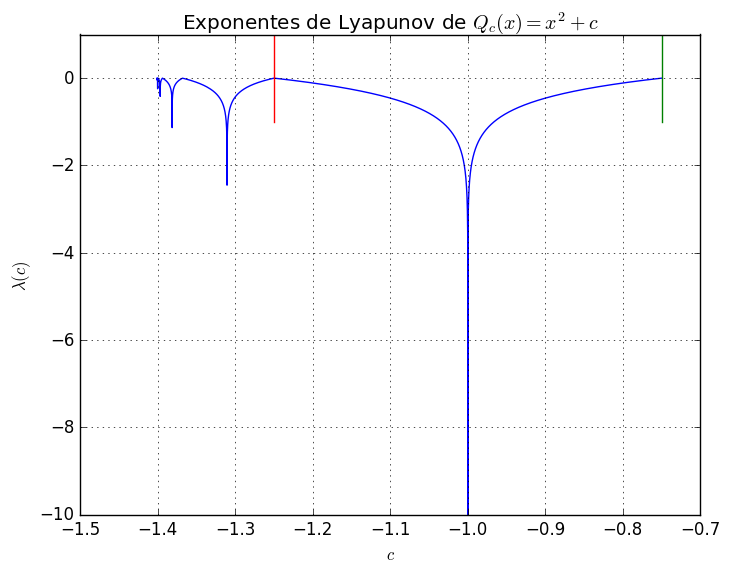

In [10]:
plot(c, func)
plot([-0.75,  -0.75], [1, -1])
plot([-1.25,  -1.25], [1, -1])
xlabel(L"c")
ylabel(L"\lambda(c)")
grid(true)
title(L"Exponentes de Lyapunov de $Q_c(x)= x^2 +c$")
ylim(-10,1.0)
show()

Ahora encontremos los valores de c para los que los exponentes se anulan:

Los valores señalados son los valores de c de las bifurcaciones ya obtenidas previamente:
$c_1=-1/4$ y $c_2=-3/4$. Y notamos que en estos valores, los exponentes de Lyapunov son cero. Por lo que se puede intuir que 
esta es la particularidad en los valores de bifurcación.

Tratemos de comprobarlo encontrando los valores de c para los cuales los exponentes se anulan.

Implementemos la siguiente función que enlista los ceros en el arreglo $evaluación$ antes definido.

In [11]:
function ceros!(valores::Array,evaluaciones::Array,resultados::Array)
    for i in 1:length(evaluaciones)
        if abs(evaluaciones[i]) < 2e-4
            push!(resultados,valores[i])
        end
    end 
    
end

ceros! (generic function with 1 method)

In [12]:
resultados=Float64[]

0-element Array{Float64,1}

In [13]:
ceros!(c,func,resultados)

In [14]:
resultados

1-element Array{Float64,1}:
 -1.39963

Notamos que solo nos da (aproximadamente) el valor de $c_1=-3/4$,  con una sensibilidad de $2e-4$, lo cual se debe
al refinamiento dado en el cálculo de los exponentes. Sin embargo, al tratar de refinar, el tiempo de cálculo comienza
a crecer muy rápido, por lo que concluimos que el método puede ser optimizado para éstos fines. Sin embargo,
al estudiar la [literarura](http://hypertextbook.com/chaos/lyapunov-1/), encontramos que nuestra deducción es correcta. 

## Ejercicio 2:
Rehacer los cálculos de los exponentes de Feigenbaum, \begin{eqnarray*} fn &=& \frac{C_n-C{n+1}}{C{n+1}-C{n+2}},\ an &=& \frac{d_n}{d{n+1}}, \end{eqnarray*}
usando los valores $C_n$ donde se tienen ciclos superestables de periodo $2^n$. (Este ejercicio es muy parecido a los ejercicios 1 y 3 de la Tarea4.)


## Ejercicio 3:
Comparar gráficamente los mapeos $Q_{c}(x)$ y $Q_{c^\prime}^2(x)$ para $c=1/4, 0, -3/4, -1, -2, -2.2$ y $c^\prime=-3/4,-1,-5/4,-1.3, -1.546\dots, -1.65$.

In [133]:
using TaylorSeries

LoadError: LoadError: ArgumentError: Module TaylorSeries not found in current path.
Run `Pkg.add("TaylorSeries")` to install the TaylorSeries package.
while loading In[133], in expression starting on line 1

In [48]:
function roots_newton(f, x0) #derivando n veces
    t = Taylor1(1)
    for ind = 1:30
       fT = f(x0+t)
       x0 = x0 - fT.coeffs[1]/fT.coeffs[2]
    end
    x0
end

roots_newton (generic function with 1 method)

In [49]:
Q4c = c -> Qcⁿ(0.0, (c, 4))
C2 = roots_newton(Q4c, -1.4)

-1.3107026413368328

In [63]:
xdual(1).der

1

In [1]:
n=10    
x0=0.0
crange=-2:1/2^10:2
coeficientes=zeros(length(crange),2)

for j in eachindex(crange)
    lambda=0.0
    for i in 1:n
        x= xdual(Qcⁿ(x0,(crange[j], n)))
      # @show x
        der=x.der
        lambda += (1.0/n)*log(abs(der))
    end 
    
    coeficientes[j,2]= lambda
    coeficientes[j,1]= crange[j]
end

LoadError: LoadError: UndefVarError: xdual not defined
while loading In[1], in expression starting on line 6

In [72]:
coeficientes

4097×2 Array{Float64,2}:
 -2.0      0.0
 -1.99902  0.0
 -1.99805  0.0
 -1.99707  0.0
 -1.99609  0.0
 -1.99512  0.0
 -1.99414  0.0
 -1.99316  0.0
 -1.99219  0.0
 -1.99121  0.0
 -1.99023  0.0
 -1.98926  0.0
 -1.98828  0.0
  ⋮           
  1.98926  0.0
  1.99023  0.0
  1.99121  0.0
  1.99219  0.0
  1.99316  0.0
  1.99414  0.0
  1.99512  0.0
  1.99609  0.0
  1.99707  0.0
  1.99805  0.0
  1.99902  0.0
  2.0      0.0

1-element Array{FloatRange{Float64},1}:
 -2.0:0.03125:2.0

In [26]:
show 

show (generic function with 199 methods)

In [27]:
show(ans)

show